In [ ]:
!git pull

Username for 'https://github.com': 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from features import calculateIC, frequency_index

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
TRAIN_DIR = "./data_gen/data/train/"
TEST_DIR = "./data_gen/data/test/"

In [3]:
plain = open(TRAIN_DIR+ "plain.txt").read().splitlines()
ss = open(TRAIN_DIR + "simple_sub.txt").read().splitlines()
vig = open(TRAIN_DIR + "vig.txt").read().splitlines()

In [4]:
test_plain = open(TEST_DIR+ "plain.txt").read().splitlines()
test_ss = open(TEST_DIR + "simple_sub.txt").read().splitlines()
test_vig = open(TEST_DIR + "vig.txt").read().splitlines()

In [5]:
def get_ic_list(l):
    ic = []
    for i in l:
        ic_i = calculateIC(i)
        ic += [ic_i]
    return ic

def get_freq_list(l):
    freq = []
    for i in l:
        freq_i = frequency_index(i)
        freq += [freq_i]
    return freq


## Training data

In [6]:
freq_ss = get_freq_list(ss)
ic_ss = get_ic_list(ss)
freq_vig = get_freq_list(vig)
ic_vig = get_ic_list(vig)

## Test Data

In [7]:
test_freq_ss = get_freq_list(test_ss)
test_ic_ss = get_ic_list(test_ss)
test_freq_vig = get_freq_list(test_vig)
test_ic_vig = get_ic_list(test_vig)

In [8]:
freq_ss[:5], freq_vig[:5], ic_ss[:5], ic_vig[:5]

([-0.3743199999999999,
  -0.37432,
  -0.4439799999999999,
  -0.5114699999999998,
  -0.4439799999999999],
 [8.326672684688674e-17,
  1.6653345369377348e-16,
  -0.1270199999999999,
  2.220446049250313e-16,
  -0.21758000000000005],
 [0.06247194373784229,
  0.06875654646117013,
  0.07290372670807453,
  0.07553101756000306,
  0.0714622641509434],
 [0.04361813556785875,
  0.04309441867424809,
  0.04759316770186335,
  0.044245073230580474,
  0.044182389937106915])

plt.figure(figsize=(8,8))
plt.plot(ic_ss, freq_ss, 'bo', alpha=0.8)
plt.plot(ic_vig, freq_vig, 'r^', alpha=0.8)
plt.xlabel("IC")
plt.ylabel("FREQUENCY")
plt.show()

In [9]:
train_vig = np.array([ic_vig, freq_vig]).T
train_ss = np.array([ic_ss, freq_ss]).T

In [10]:
test_vig = np.array([test_ic_vig, test_freq_vig]).T
test_ss = np.array([test_ic_ss, test_freq_ss]).T

In [11]:
ic_vig[:5], train_vig[:5,0]

([0.04361813556785875,
  0.04309441867424809,
  0.04759316770186335,
  0.044245073230580474,
  0.044182389937106915],
 array([0.04361814, 0.04309442, 0.04759317, 0.04424507, 0.04418239]))

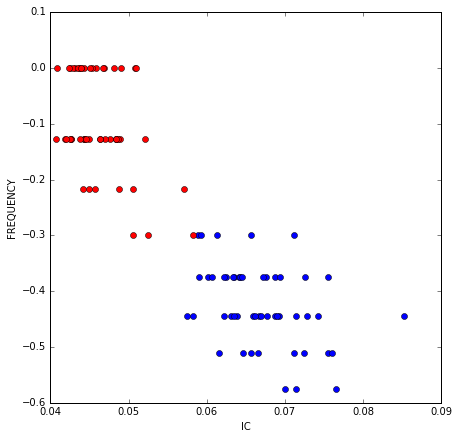

In [12]:
plt.figure(figsize=(7,7))
plt.plot(train_ss[:,0], train_ss[:,1], 'bo')
plt.plot(train_vig[:,0], train_vig[:,1], 'ro')
plt.xlabel("IC")
plt.ylabel("FREQUENCY")
plt.show()

Zero for simple sub and one for vigenere

In [13]:
yv = np.ones(50)
ys = np.zeros(50)

In [14]:
yv.shape, ys[:10]

((50,), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [47]:
x_train = np.vstack((train_ss, train_vig))
y_train = np.hstack((ys, yv)).reshape(-1, 1)

In [27]:
x_test = np.vstack((test_ss, test_vig))
y_test = np.hstack((np.zeros(50), np.ones(50)))

In [17]:
X = tf.placeholder(tf.float32, [None, 2])
W = tf.get_variable("W", shape=[2, 1],
           initializer=tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.zeros([1]))
init = tf.global_variables_initializer()

In [51]:
Y = tf.nn.softmax(tf.matmul(X, W) + b)

In [53]:
Y_ = tf.placeholder(tf.float32, [None, 1])

In [54]:
cross_entropy = -tf.reduce_sum(Y_ * tf.log(Y))

In [55]:
is_correct = tf.equal(tf.arg_max(Y_, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [56]:
optimizer = tf.train.AdamOptimizer()
train_step = optimizer.minimize(cross_entropy)

In [57]:
sess = tf.Session()
sess.run(init)

In [58]:
x_train.shape

(100, 2)

In [59]:
y_train.shape

(100, 1)

In [60]:
for step in range(200):
    _, l, pred = sess.run([train_step, cross_entropy, Y], feed_dict={X : x_train, Y_ : y_train})
    
    if(step%5==0):
        print('Loss after {} -- {}'.format(step, l))
 

FailedPreconditionError: Attempting to use uninitialized value beta1_power_2
	 [[Node: beta1_power_2/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](beta1_power_2)]]
	 [[Node: Softmax_2/_7 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_120_Softmax_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'beta1_power_2/read', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-5c2ae8978455>", line 2, in <module>
    train_step = optimizer.minimize(cross_entropy)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/optimizer.py", line 369, in minimize
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/optimizer.py", line 520, in apply_gradients
    self._create_slots([_get_variable_for(v) for v in var_list])
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/adam.py", line 124, in _create_slots
    colocate_with=first_var)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/training/optimizer.py", line 629, in _create_non_slot_variable
    v = variable_scope.variable(initial_value, name=name, trainable=False)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 2157, in variable
    use_resource=use_resource)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 2147, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variable_scope.py", line 2130, in default_variable_creator
    constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variables.py", line 233, in __init__
    constraint=constraint)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/variables.py", line 381, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/array_ops.py", line 131, in identity
    return gen_array_ops.identity(input, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 2051, in identity
    "Identity", input=input, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3271, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1650, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value beta1_power_2
	 [[Node: beta1_power_2/read = Identity[T=DT_FLOAT, _class=["loc:@Variable"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](beta1_power_2)]]
	 [[Node: Softmax_2/_7 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_120_Softmax_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [61]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [62]:
model = Sequential()
model.add(Dense(1, input_shape=(2,)))

In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=500, batch_size=10,  verbose=2)

Epoch 1/500
0s - loss: 0.0735 - acc: 0.6700
Epoch 2/500
0s - loss: 0.0734 - acc: 0.6700
Epoch 3/500
0s - loss: 0.0734 - acc: 0.6700
Epoch 4/500
0s - loss: 0.0734 - acc: 0.6700
Epoch 5/500
0s - loss: 0.0733 - acc: 0.6700
Epoch 6/500
0s - loss: 0.0733 - acc: 0.6700
Epoch 7/500
0s - loss: 0.0733 - acc: 0.6700
Epoch 8/500
0s - loss: 0.0732 - acc: 0.6700
Epoch 9/500
0s - loss: 0.0733 - acc: 0.6700
Epoch 10/500
0s - loss: 0.0732 - acc: 0.6700
Epoch 11/500
0s - loss: 0.0732 - acc: 0.6700
Epoch 12/500
0s - loss: 0.0732 - acc: 0.6700
Epoch 13/500
0s - loss: 0.0732 - acc: 0.6700
Epoch 14/500
0s - loss: 0.0731 - acc: 0.6700
Epoch 15/500
0s - loss: 0.0733 - acc: 0.6700
Epoch 16/500
0s - loss: 0.0732 - acc: 0.6700
Epoch 17/500
0s - loss: 0.0731 - acc: 0.6700
Epoch 18/500
0s - loss: 0.0730 - acc: 0.6700
Epoch 19/500
0s - loss: 0.0730 - acc: 0.6700
Epoch 20/500
0s - loss: 0.0730 - acc: 0.6700
Epoch 21/500
0s - loss: 0.0730 - acc: 0.6700
Epoch 22/500
0s - loss: 0.0730 - acc: 0.6700
Epoch 23/500
0s - l

0s - loss: 0.0697 - acc: 0.6700
Epoch 186/500
0s - loss: 0.0697 - acc: 0.6700
Epoch 187/500
0s - loss: 0.0696 - acc: 0.6700
Epoch 188/500
0s - loss: 0.0696 - acc: 0.6700
Epoch 189/500
0s - loss: 0.0696 - acc: 0.6700
Epoch 190/500
0s - loss: 0.0696 - acc: 0.6700
Epoch 191/500
0s - loss: 0.0696 - acc: 0.6700
Epoch 192/500
0s - loss: 0.0696 - acc: 0.6700
Epoch 193/500
0s - loss: 0.0696 - acc: 0.6700
Epoch 194/500
0s - loss: 0.0695 - acc: 0.6700
Epoch 195/500
0s - loss: 0.0695 - acc: 0.6700
Epoch 196/500
0s - loss: 0.0695 - acc: 0.6700
Epoch 197/500
0s - loss: 0.0695 - acc: 0.6700
Epoch 198/500
0s - loss: 0.0694 - acc: 0.6700
Epoch 199/500
0s - loss: 0.0695 - acc: 0.6700
Epoch 200/500
0s - loss: 0.0694 - acc: 0.6700
Epoch 201/500
0s - loss: 0.0694 - acc: 0.6700
Epoch 202/500
0s - loss: 0.0694 - acc: 0.6700
Epoch 203/500
0s - loss: 0.0693 - acc: 0.6700
Epoch 204/500
0s - loss: 0.0693 - acc: 0.6700
Epoch 205/500
0s - loss: 0.0693 - acc: 0.6700
Epoch 206/500
0s - loss: 0.0693 - acc: 0.6700
Ep

0s - loss: 0.0666 - acc: 0.6700
Epoch 366/500
0s - loss: 0.0666 - acc: 0.6700
Epoch 367/500
0s - loss: 0.0665 - acc: 0.6700
Epoch 368/500
0s - loss: 0.0665 - acc: 0.6700
Epoch 369/500
0s - loss: 0.0665 - acc: 0.6700
Epoch 370/500
0s - loss: 0.0666 - acc: 0.6700
Epoch 371/500
0s - loss: 0.0664 - acc: 0.6700
Epoch 372/500
0s - loss: 0.0664 - acc: 0.6700
Epoch 373/500
0s - loss: 0.0664 - acc: 0.6700
Epoch 374/500
0s - loss: 0.0664 - acc: 0.6700
Epoch 375/500
0s - loss: 0.0664 - acc: 0.6700
Epoch 376/500
0s - loss: 0.0664 - acc: 0.6700
Epoch 377/500
0s - loss: 0.0663 - acc: 0.6700
Epoch 378/500
0s - loss: 0.0664 - acc: 0.6700
Epoch 379/500
0s - loss: 0.0663 - acc: 0.6700
Epoch 380/500
0s - loss: 0.0663 - acc: 0.6700
Epoch 381/500
0s - loss: 0.0665 - acc: 0.6700
Epoch 382/500
0s - loss: 0.0664 - acc: 0.6700
Epoch 383/500
0s - loss: 0.0663 - acc: 0.6700
Epoch 384/500
0s - loss: 0.0662 - acc: 0.6700
Epoch 385/500
0s - loss: 0.0662 - acc: 0.6700
Epoch 386/500
0s - loss: 0.0662 - acc: 0.6700
Ep

In [74]:
x_test[-1]

array([4.46284794e-02, 1.38777878e-16])

In [79]:
model.predict(x_test[:5])

array([[ 0.38057196],
       [ 0.3676772 ],
       [ 0.36016142],
       [ 0.35363817],
       [-0.3363304 ]], dtype=float32)

In [81]:
a = model.predict(x_test)

In [82]:
a

array([[ 0.38057196],
       [ 0.3676772 ],
       [ 0.36016142],
       [ 0.35363817],
       [-0.3363304 ],
       [ 0.37701893],
       [-0.02322316],
       [ 0.7715844 ],
       [ 1.2275703 ],
       [-0.6968577 ],
       [ 1.8844777 ],
       [ 1.2487319 ],
       [ 1.2571735 ],
       [ 1.2431394 ],
       [ 1.8829366 ],
       [ 1.2610192 ],
       [ 1.2499195 ],
       [ 1.2568063 ],
       [ 1.8873212 ],
       [ 1.8842999 ]], dtype=float32)